In [90]:
import pandas as pd
import seaborn as sb   
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.svm import SVC

In [91]:
df = pd.read_csv('players.csv')
df

,playerid,fname,lname,position,height,weight,birthday,country,school,draft_year,draft_round,draft_number
0,1630173,Precious,Achiuwa,Forward,6-8,225,1999-09-19,Nigeria,Memphis,2020,1.0,20.0
1,203500,Steven,Adams,Center,6-11,265,1993-07-20,New Zealand,Pittsburgh,2013,1.0,12.0
2,1628389,Bam,Adebayo,Center-Forward,6-9,255,1997-07-18,USA,Kentucky,2017,1.0,14.0
3,1630534,Ochai,Agbaji,Guard,6-5,215,2000-04-20,USA,Kansas,2022,1.0,14.0
4,1630583,Santi,Aldama,Forward-Center,7-0,215,2001-01-10,Spain,Loyola-Maryland,2021,1.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...
543,201152,Thaddeus,Young,Forward,6-8,235,1988-06-21,USA,Georgia Tech,2007,1.0,12.0
544,1629027,Trae,Young,Guard,6-1,164,1998-09-19,USA,Oklahoma,2018,1.0,5.0
545,1630209,Omer,Yurtseven,Center,6-11,275,1998-06-19,Turkey,Georgetown,2020,NaN,NaN
546,203469,Cody,Zeller,Forward-Center,6-11,240,1992-10-05,USA,Indiana,2013,1.0,4.0


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   playerid      548 non-null    int64  
 1   fname         548 non-null    object 
 2   lname         548 non-null    object 
 3   position      548 non-null    object 
 4   height        548 non-null    object 
 5   weight        548 non-null    int64  
 6   birthday      548 non-null    object 
 7   country       548 non-null    object 
 8   school        538 non-null    object 
 9   draft_year    548 non-null    int64  
 10  draft_round   409 non-null    float64
 11  draft_number  408 non-null    float64
dtypes: float64(2), int64(3), object(7)
memory usage: 51.5+ KB


In [93]:
df.head(10)

,playerid,fname,lname,position,height,weight,birthday,country,school,draft_year,draft_round,draft_number
0,1630173,Precious,Achiuwa,Forward,6-8,225,1999-09-19,Nigeria,Memphis,2020,1.0,20.0
1,203500,Steven,Adams,Center,6-11,265,1993-07-20,New Zealand,Pittsburgh,2013,1.0,12.0
2,1628389,Bam,Adebayo,Center-Forward,6-9,255,1997-07-18,USA,Kentucky,2017,1.0,14.0
3,1630534,Ochai,Agbaji,Guard,6-5,215,2000-04-20,USA,Kansas,2022,1.0,14.0
4,1630583,Santi,Aldama,Forward-Center,7-0,215,2001-01-10,Spain,Loyola-Maryland,2021,1.0,30.0
5,1629638,Nickeil,Alexander-Walker,Guard,6-5,205,1998-09-02,Canada,Virginia Tech,2019,1.0,17.0
6,1628960,Grayson,Allen,Guard,6-4,198,1995-10-08,USA,Duke,2018,1.0,21.0
7,1628386,Jarrett,Allen,Center,6-9,243,1998-04-21,USA,Texas,2017,1.0,22.0
8,1630631,Jose,Alvarado,Guard,6-0,179,1998-04-12,USA,Georgia Tech,2021,NaN,NaN
9,203937,Kyle,Anderson,Forward-Guard,6-9,230,1993-09-20,USA,UCLA,2014,1.0,30.0


In [94]:
#Making a subset
newdf = df[['school', 'playerid','fname','lname','weight','draft_year','country','draft_round','position','height']]
newdf

,school,playerid,fname,lname,weight,draft_year,country,draft_round,position,height
0,Memphis,1630173,Precious,Achiuwa,225,2020,Nigeria,1.0,Forward,6-8
1,Pittsburgh,203500,Steven,Adams,265,2013,New Zealand,1.0,Center,6-11
2,Kentucky,1628389,Bam,Adebayo,255,2017,USA,1.0,Center-Forward,6-9
3,Kansas,1630534,Ochai,Agbaji,215,2022,USA,1.0,Guard,6-5
4,Loyola-Maryland,1630583,Santi,Aldama,215,2021,Spain,1.0,Forward-Center,7-0
...,...,...,...,...,...,...,...,...,...,...
543,Georgia Tech,201152,Thaddeus,Young,235,2007,USA,1.0,Forward,6-8
544,Oklahoma,1629027,Trae,Young,164,2018,USA,1.0,Guard,6-1
545,Georgetown,1630209,Omer,Yurtseven,275,2020,Turkey,NaN,Center,6-11
546,Indiana,203469,Cody,Zeller,240,2013,USA,1.0,Forward-Center,6-11


In [155]:
# Here I am making a subset that will only include information starting from the year 2019 and going up.
# I chose to do it on the most recent years for familiarity on the players 
# and aslo taking covid into account
new_df = newdf[(newdf['country'] == 'USA') & (newdf['draft_year'] >= 2013)]

In [156]:
df_schools_2020 = df[(df['country'] == 'USA') & (df['draft_year'] == 2020)]

KeyError: 'country'

In [157]:
new_df.head(5)

,school,playerid,fname,lname,weight,draft_year,country,draft_round,position,height
2,Kentucky,1628389,Bam,Adebayo,255,2017,USA,1.0,Center-Forward,6-9
3,Kansas,1630534,Ochai,Agbaji,215,2022,USA,1.0,Guard,6-5
6,Duke,1628960,Grayson,Allen,198,2018,USA,1.0,Guard,6-4
7,Texas,1628386,Jarrett,Allen,243,2017,USA,1.0,Center,6-9
9,UCLA,203937,Kyle,Anderson,230,2014,USA,1.0,Forward-Guard,6-9


In [159]:
new_df[new_df['draft_year']==2013]['fname']

73         Reggie
80     Kentavious
87        Michael
193           Tim
327            CJ
361          Mike
370       Nerlens
382        Victor
392         Mason
398          Otto
546          Cody
Name: fname, dtype: object

In [160]:
new_df.isnull().sum()


school         0
playerid       0
fname          0
lname          0
weight         0
draft_year     0
country        0
draft_round    0
position       0
height         0
dtype: int64

In [161]:
newdf.dropna(subset=['school','draft_round','draft_year'], inplace=True)
newdf['school'].isnull().sum()



C:\Users\eddyk\AppData\Local\Temp\ipykernel_22292\2632350062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf.dropna(subset=['school','draft_round','draft_year'], inplace=True)


0

In [170]:
# Using this info I will create a seperate excel sheet that will include the schools and their regions.
#That way when I graph the dataset, it will be able to read and understood clearly

#df['school'].unique()
new_df['school'].unique()

array(['Kentucky', 'Kansas', 'Duke', 'Texas', 'UCLA', 'North Carolina',
       'Wisconsin-Milwaukee', 'Illawarra', 'TCU', 'Florida State',
       'Ohio State', 'Princeton HS (OH)', 'NBA G League Ignite',
       'Villanova', 'Connecticut', 'College of Charleston', 'Virginia',
       'Miami', 'California', 'Baylor', 'Southern Methodist', 'Oregon',
       'Indiana', 'Georgia', 'West Virginia', 'Syracuse', 'Tennessee',
       'Michigan State', 'Arizona State', 'Missouri', 'Wake Forest',
       'Gonzaga', 'Notre Dame', 'Texas Tech', 'Oklahoma State',
       'Wisconsin', 'Alabama', 'Colorado', 'Illinois', 'Providence',
       'Memphis', 'Louisiana State', 'Pepperdine', 'San Diego State',
       'Washington', 'Arkansas', 'Vanderbilt', 'Iowa', 'Arizona',
       'Houston', 'Iowa State', 'Michigan', 'Louisville', 'Bowling Green',
       'Maryland', 'Virginia Commonwealth', 'Purdue', 'Missouri State',
       'Auburn', 'Utah', 'Florida', 'Nevada', 'IMG Academy (FL)',
       'Lehigh', 'Creighton', 

In [171]:
#Reading the excel sheet I made
df_regions = pd.read_csv('player_regions.csv')

In [172]:
new_df.head()

,school,playerid,fname,lname,weight,draft_year,country,draft_round,position,height
2,Kentucky,1628389,Bam,Adebayo,255,2017,USA,1.0,Center-Forward,6-9
3,Kansas,1630534,Ochai,Agbaji,215,2022,USA,1.0,Guard,6-5
6,Duke,1628960,Grayson,Allen,198,2018,USA,1.0,Guard,6-4
7,Texas,1628386,Jarrett,Allen,243,2017,USA,1.0,Center,6-9
9,UCLA,203937,Kyle,Anderson,230,2014,USA,1.0,Forward-Guard,6-9


In [190]:
#Grouped both dataframes together based on school.
#Now I am merging the two dataframes

merged_df = pd.merge(new_df, df_regions, on='school', how='right', suffixes=('_left','_right'))

In [191]:
merged_df = pd.get_dummies(merged_df, columns=['draft_round'], drop_first=True)
merged_df

,school,playerid,fname,lname,weight,draft_year,country,position,height,Region_Continent,draft_round_1.0,draft_round_2.0
0,Duke,1628960.0,Grayson,Allen,198.0,2018.0,USA,Guard,6-4,SouthEast,1,0
1,Duke,1628963.0,Marvin,Bagley III,235.0,2018.0,USA,Forward,6-10,SouthEast,1,0
2,Duke,1631094.0,Paolo,Banchero,250.0,2022.0,USA,Forward,6-10,SouthEast,1,0
3,Duke,1630176.0,Vernon,Carey Jr.,270.0,2020.0,USA,Center,6-10,SouthEast,0,1
4,Duke,1628976.0,Wendell,Carter Jr.,270.0,2018.0,USA,Center-Forward,6-10,SouthEast,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
310,California-Santa Barbara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SouthWest,0,0
311,George Washington,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SouthEast,0,0
312,Santa Clara,1631114.0,Jalen,Williams,211.0,2022.0,USA,Guard-Forward,6-5,SouthWest,1,0
313,Buffalo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NorthEast,0,0


In [192]:
count_per_draft_round = merged_df.filter(like='draft_round_').sum(axis=0)

# Display the counts
print(count_per_draft_round)

draft_round_1.0    152
draft_round_2.0     79
dtype: int64


In [193]:
merged_df[merged_df['lname']=='Curry']['fname']

Series([], Name: fname, dtype: object)

In [194]:
merged_df.head(10)

,school,playerid,fname,lname,weight,draft_year,country,position,height,Region_Continent,draft_round_1.0,draft_round_2.0
0,Duke,1628960.0,Grayson,Allen,198.0,2018.0,USA,Guard,6-4,SouthEast,1,0
1,Duke,1628963.0,Marvin,Bagley III,235.0,2018.0,USA,Forward,6-10,SouthEast,1,0
2,Duke,1631094.0,Paolo,Banchero,250.0,2022.0,USA,Forward,6-10,SouthEast,1,0
3,Duke,1630176.0,Vernon,Carey Jr.,270.0,2020.0,USA,Center,6-10,SouthEast,0,1
4,Duke,1628976.0,Wendell,Carter Jr.,270.0,2018.0,USA,Center-Forward,6-10,SouthEast,1,0
5,Duke,1631100.0,AJ,Griffin,220.0,2022.0,USA,Forward,6-6,SouthEast,1,0
6,Duke,1627742.0,Brandon,Ingram,190.0,2016.0,USA,Forward,6-8,SouthEast,1,0
7,Duke,1628402.0,Frank,Jackson,205.0,2017.0,USA,Guard,6-3,SouthEast,0,1
8,Duke,1630552.0,Jalen,Johnson,219.0,2021.0,USA,Forward,6-8,SouthEast,1,0
9,Duke,1630200.0,Tre,Jones,185.0,2020.0,USA,Guard,6-1,SouthEast,0,1


In [195]:
merged_df[merged_df['draft_year']== 2022]['fname']

2          Paolo
5             AJ
11        Trevor
13       Wendell
18          Mark
21         Jalen
22          Josh
43          TyTy
44         Ochai
45     Christian
62        Peyton
91         Dalen
93       Patrick
96         Bryce
108       Malaki
109         E.J.
114       MarJon
116        Jaden
123       Jaylin
134       Tyrese
142      Kendall
149       Jabari
164      Kennedy
169          Max
181         Jake
183        Blake
191       Johnny
194           JD
198         Tari
203       Isaiah
236       Keegan
253        Vince
254        Jaden
293        David
294         Ryan
312        Jalen
Name: fname, dtype: object

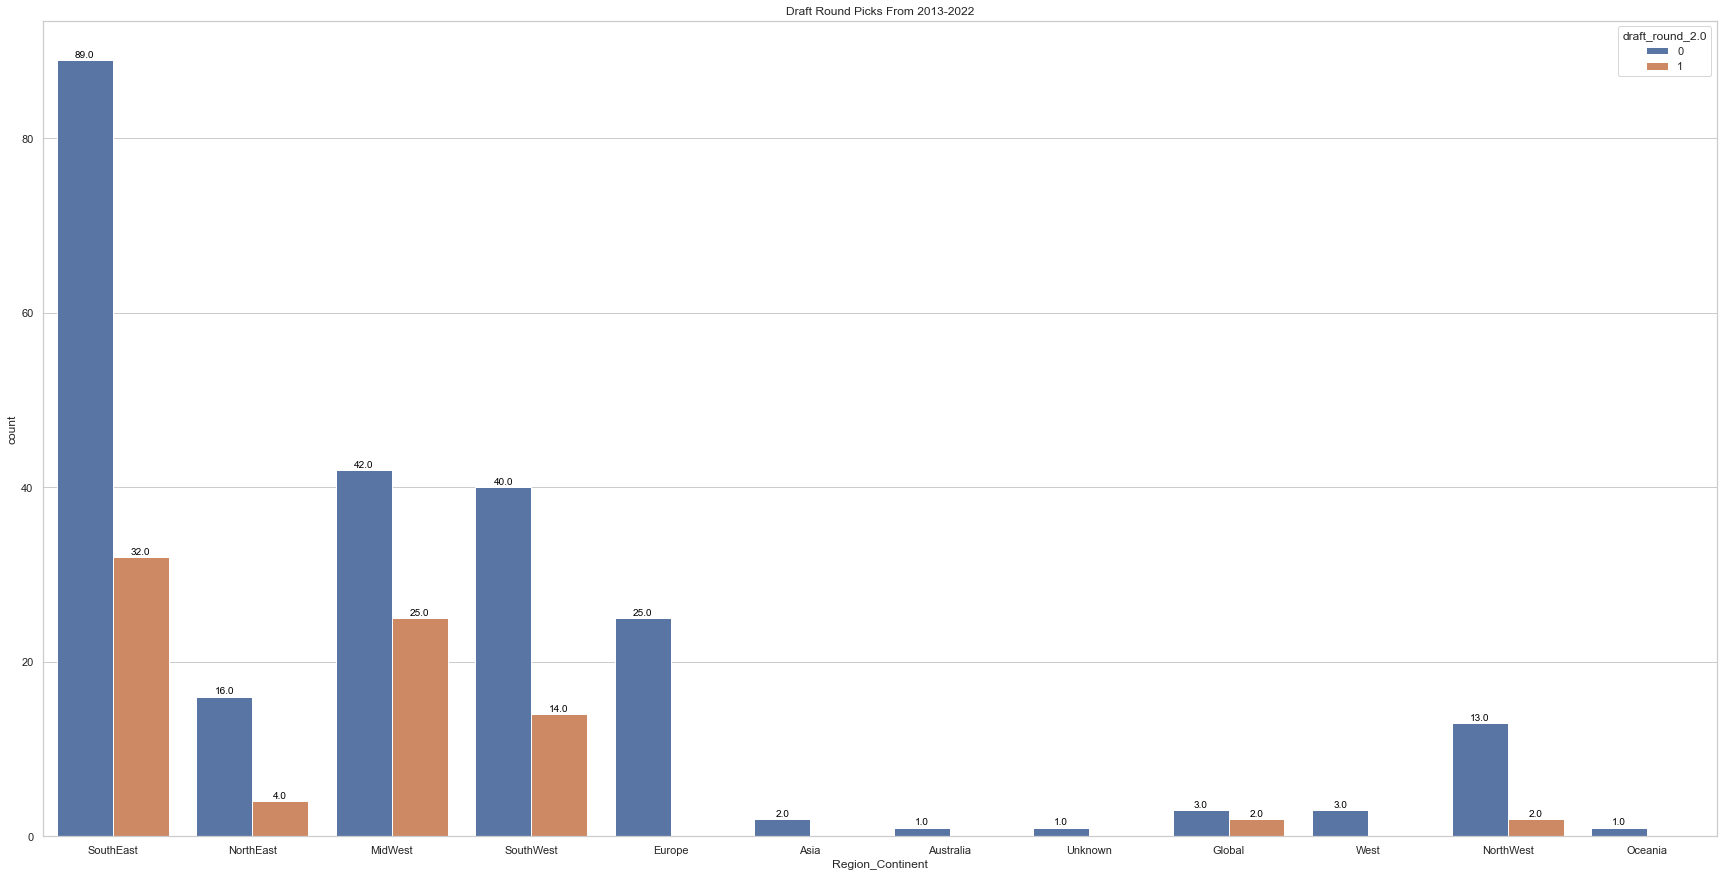

In [196]:
sb.set(style="whitegrid")

# Plotting the count of one-hot encoded 'draft_round' values
plt.figure(figsize=(30, 15))
plt.title('Draft Round Picks From 2013-2022')
plt.xlabel('Draft Round')
plt.ylabel('Count')

ax = sb.countplot(data=merged_df, x='Region_Continent', hue='draft_round_2.0')

# Display count values on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show the plot
plt.show()

#This graph Diaplays the sum of round 1 = 0 and round 2 = 1 in each Region, Continnt etc starting from 2019 to 2022
#Based on this it shows that the SouthEast region in the United States starting from 2019 - 2022 has had the most Draft Round 1 picks.
#Using this information NBA teams can have and idea of where to look when searching for future prospects.
#Considering this was around covid that could also play 
# a role in why most Draft Round 1 picks were from the SouthEast

In [213]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 0 to 314
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   school            314 non-null    object 
 1   playerid          232 non-null    float64
 2   fname             232 non-null    object 
 3   lname             232 non-null    object 
 4   weight            232 non-null    float64
 5   draft_year        232 non-null    float64
 6   country           232 non-null    object 
 7   position          232 non-null    object 
 8   height            232 non-null    object 
 9   Region_Continent  315 non-null    object 
 10  draft_round_1.0   315 non-null    uint8  
 11  draft_round_2.0   315 non-null    uint8  
dtypes: float64(3), object(7), uint8(2)
memory usage: 27.7+ KB


In [237]:
merged_df.head()

,school,playerid,fname,lname,weight,draft_year,country,position,height,Region_Continent,draft_round_1.0,draft_round_2.0
0,Duke,1628960.0,Grayson,Allen,198.0,2018.0,USA,Guard,6-4,SouthEast,1,0
1,Duke,1628963.0,Marvin,Bagley III,235.0,2018.0,USA,Forward,6-10,SouthEast,1,0
2,Duke,1631094.0,Paolo,Banchero,250.0,2022.0,USA,Forward,6-10,SouthEast,1,0
3,Duke,1630176.0,Vernon,Carey Jr.,270.0,2020.0,USA,Center,6-10,SouthEast,0,1
4,Duke,1628976.0,Wendell,Carter Jr.,270.0,2018.0,USA,Center-Forward,6-10,SouthEast,1,0


In [245]:
merged_df[merged_df['lname']=='Poole']

,school,playerid,fname,lname,weight,draft_year,country,position,height,Region_Continent,draft_round_1.0,draft_round_2.0
209,Michigan,1629673.0,Jordan,Poole,194.0,2019.0,USA,Guard,6-4,MidWest,1,0


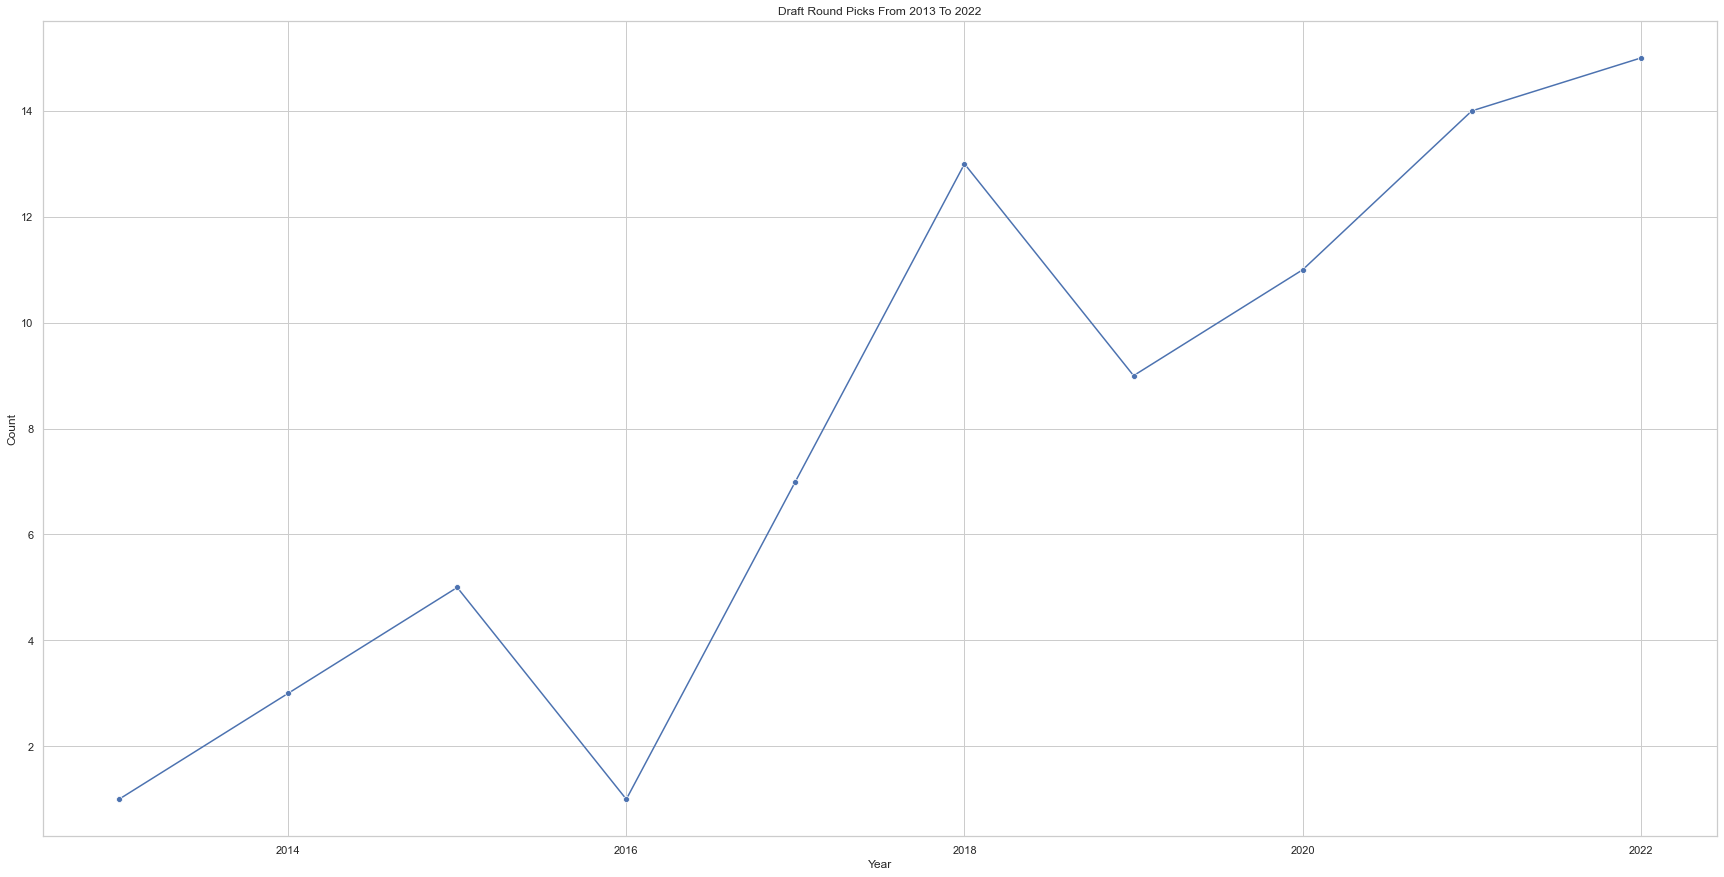

In [220]:
import matplotlib.pyplot as plt
import seaborn as sb

# Set the Seaborn style
sb.set(style="whitegrid")

# Assuming 'merged_df' has a 'Year' column representing the year of the draft
# and 'draft_round_2.0' is the column representing the second round picks
plt.figure(figsize=(30, 15))

# Group the data by year and calculate the count of draft picks for each year
draft_counts = merged_df.groupby('draft_year')['draft_round_2.0'].sum().reset_index()

# Plotting the time series graph
sb.lineplot(data=draft_counts, x='draft_year', y='draft_round_2.0', marker='o')

# Add title and labels
plt.title('Draft Round Picks From 2013 To 2022')
plt.xlabel('Year')
plt.ylabel('Count')

# Show the plot
plt.show()


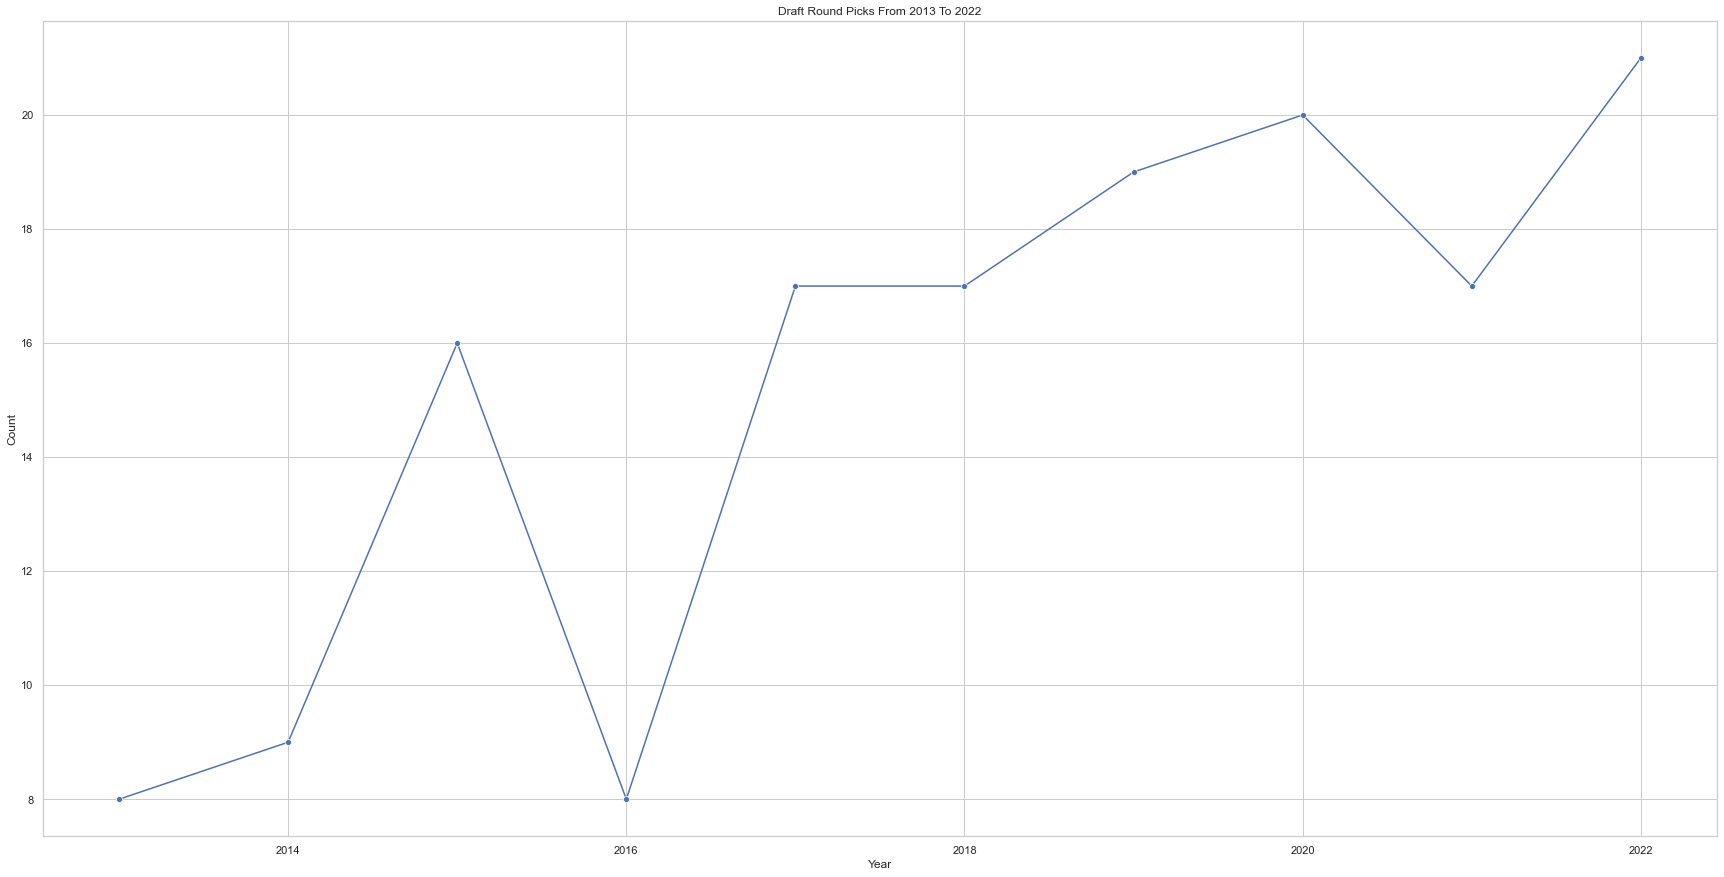

In [236]:
import matplotlib.pyplot as plt
import seaborn as sb

# Set the Seaborn style
sb.set(style="whitegrid")

# Assuming 'merged_df' has a 'Year' column representing the year of the draft
# and 'draft_round_2.0' is the column representing the second round picks
plt.figure(figsize=(30, 15))

# Group the data by year and calculate the count of draft picks for each year
draft_counts = merged_df.groupby('draft_year')['draft_round_1.0'].sum().reset_index()

# Plotting the time series graph
sb.lineplot(data=draft_counts, x='draft_year', y='draft_round_1.0', marker='o')

# Add title and labels
plt.title('Draft Round Picks From 2013 To 2022')
plt.xlabel('Year')
plt.ylabel('Count')

# Show the plot
plt.show()

In [221]:
new_df[new_df['draft_year']==2019]['lname']

36            Bazley
58          Brantley
97           Claxton
108           Culver
160          Gafford
161          Garland
207            Hayes
212            Herro
222    Horton-Tucker
229           Hunter
246           Jerome
249          Johnson
252          Johnson
289         Langford
300           Little
311             Mann
317           Martin
330        McDaniels
353           Morant
371           Nowell
377            Okeke
381           Okpala
395            Poole
396       Porter Jr.
414          Reddish
426             Roby
481         Thybulle
507       Washington
516            White
525         Williams
535       Williamson
536          Windler
Name: lname, dtype: object

In [222]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 0 to 314
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   school            314 non-null    object 
 1   playerid          232 non-null    float64
 2   fname             232 non-null    object 
 3   lname             232 non-null    object 
 4   weight            232 non-null    float64
 5   draft_year        232 non-null    float64
 6   country           232 non-null    object 
 7   position          232 non-null    object 
 8   height            232 non-null    object 
 9   Region_Continent  315 non-null    object 
 10  draft_round_1.0   315 non-null    uint8  
 11  draft_round_2.0   315 non-null    uint8  
dtypes: float64(3), object(7), uint8(2)
memory usage: 35.8+ KB


In [223]:
new_df.head()

,school,playerid,fname,lname,weight,draft_year,country,draft_round,position,height
2,Kentucky,1628389,Bam,Adebayo,255,2017,USA,1.0,Center-Forward,6-9
3,Kansas,1630534,Ochai,Agbaji,215,2022,USA,1.0,Guard,6-5
6,Duke,1628960,Grayson,Allen,198,2018,USA,1.0,Guard,6-4
7,Texas,1628386,Jarrett,Allen,243,2017,USA,1.0,Center,6-9
9,UCLA,203937,Kyle,Anderson,230,2014,USA,1.0,Forward-Guard,6-9


In [224]:
new_merger = pd.get_dummies(merged_df, columns=['position','height'], drop_first=True)

In [225]:
new_merger.describe()

,playerid,weight,draft_year,draft_round_1.0,draft_round_2.0,position_Center-Forward,position_Forward,position_Forward-Center,position_Forward-Guard,position_Guard,...,height_6-11,height_6-2,height_6-3,height_6-4,height_6-5,height_6-6,height_6-7,height_6-8,height_6-9,height_7-0
count,2.320000e+02,232.000000,232.000000,315.00000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,...,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,1.494234e+06,213.077586,2018.543103,0.48254,0.250794,0.031746,0.200000,0.053968,0.028571,0.317460,...,0.028571,0.038095,0.044444,0.101587,0.111111,0.073016,0.076190,0.073016,0.073016,0.028571
std,4.185896e+05,22.365191,2.642943,0.50049,0.434160,0.175602,0.400636,0.226315,0.166864,0.466229,...,0.166864,0.191731,0.206408,0.302585,0.314770,0.260576,0.265725,0.260576,0.260576,0.166864
min,2.034570e+05,165.000000,2013.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.628376e+06,195.750000,2017.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.629638e+06,210.500000,2019.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.630533e+06,226.750000,2021.000000,1.00000,0.500000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.631246e+06,284.000000,2022.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [226]:
#Remove null values from the DataFrame
new_merger_cleaned = new_merger.dropna()

# Check for null values in the cleaned DataFrame
print(new_merger_cleaned.isnull().sum())

school                     0
playerid                   0
fname                      0
lname                      0
weight                     0
draft_year                 0
country                    0
Region_Continent           0
draft_round_1.0            0
draft_round_2.0            0
position_Center-Forward    0
position_Forward           0
position_Forward-Center    0
position_Forward-Guard     0
position_Guard             0
position_Guard-Forward     0
height_6-0                 0
height_6-1                 0
height_6-10                0
height_6-11                0
height_6-2                 0
height_6-3                 0
height_6-4                 0
height_6-5                 0
height_6-6                 0
height_6-7                 0
height_6-8                 0
height_6-9                 0
height_7-0                 0
dtype: int64


In [231]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
trainX, testX, trainY, testY = train_test_split(new_merger_cleaned[[ 'position_Center-Forward', 'position_Forward', 'position_Forward-Center','position_Forward-Guard', 'position_Guard','position_Guard-Forward', 'weight','height_6-2','height_6-3','height_6-4','height_6-5','height_6-6','height_6-7','height_6-8','height_6-9','height_7-0']], new_merger_cleaned['draft_round_2.0'], test_size=0.25, random_state=42)

In [233]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Instantiate the classifier
lr = LinearRegression()

# Train the classifier
lr.fit(trainX, trainY)

# Make predictions on the test set
lr_pred = lr.predict(testX)

mse_lr = mean_squared_error(testY, lr_pred)

# Report the evaluation metric
print("\nLinear Regression Performance Metric:")
print("Mean Squared Error:", mse_lr)


Linear Regression Performance Metric:
Mean Squared Error: 0.29269127549874646


In [234]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Assuming you have your time series data loaded into trainY and testY

# Define the ARIMA model parameters (p, d, q)
p = 1  # Autoregression order
d = 1  # Differencing order
q = 1  # Moving average order

# Instantiate and fit the ARIMA model
arima_model = ARIMA(trainY, order=(p, d, q))
arima_result = arima_model.fit()

# Make predictions on the test set
arima_pred = arima_result.predict(start=len(trainY), end=len(trainY) + len(testY) - 1, typ='levels')

# Calculate Mean Squared Error
mse_arima = mean_squared_error(testY, arima_pred)

# Report the evaluation metric
print("\nARIMA Performance Metric:")
print("Mean Squared Error:", mse_arima)

c:\Users\eddyk\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\eddyk\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\eddyk\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



ARIMA Performance Metric:
Mean Squared Error: 0.25205518971987007


c:\Users\eddyk\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [235]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Assuming you have your time series data loaded into trainY and testY

# Define the SARIMA model parameters (p, d, q, P, D, Q, s)
p = 1  # Autoregression order
d = 1  # Differencing order
q = 1  # Moving average order
P = 1  # Seasonal autoregression order
D = 1  # Seasonal differencing order
Q = 1  # Seasonal moving average order
s = 12  # Seasonal period (e.g., 12 for monthly data with yearly seasonality)

# Instantiate and fit the SARIMA model
sarima_model = SARIMAX(trainY, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_result = sarima_model.fit()

# Make predictions on the test set
sarima_pred = sarima_result.predict(start=len(trainY), end=len(trainY) + len(testY) - 1, typ='levels')

# Calculate Mean Squared Error
mse_sarima = mean_squared_error(testY, sarima_pred)

# Report the evaluation metric
print("\nSARIMA Performance Metric:")
print("Mean Squared Error:", mse_sarima)

c:\Users\eddyk\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\eddyk\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\eddyk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\eddyk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



SARIMA Performance Metric:
Mean Squared Error: 0.25267146905073207


c:\Users\eddyk\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
